<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%time
!pip install --pre dgl -f https://data.dgl.ai/wheels/cu118/repo.html
!pip install --pre dglgo -f https://data.dgl.ai/wheels-test/repo.html
!pip install alignn phonopy

Looking in links: https://data.dgl.ai/wheels/cu118/repo.html
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.9/370.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.8.1
    Uninstalling pydantic-1.8.1:
      Successfully uninstalled pydantic-1.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alignn 2023.7.10 requires pydantic==1.8.1, but you have pydantic 2.1.1 which is incompatible.
confection 0.1.0 requires pydantic!=1.8,!=1.8.1,<1.11.0,>=1.7.4, but you have pydantic 2.1.1 which is incompatible.
inflect 6.0.5 requires pydantic<2,>=1.9.1, but you have pydantic 2.1.1 which is incompatible.
spacy 3.5.4 requires pydantic!=1.8,!=1.8.1,<1.11.0,>=1.7.4, but you have pydanti

In [24]:
from alignn.ff.ff import phonons,ForceField
from jarvis.core.atoms import ase_to_atoms
from jarvis.io.vasp.inputs import Poscar
from alignn.ff.ff import AlignnAtomwiseCalculator,default_path,wt10_path,fd_path
model_path = wt10_path() #default_path()
calc = AlignnAtomwiseCalculator(path=model_path)


def get_thermal_prop(poscar_string='',optimize=False,get_primitive=True):
    pos = Poscar.from_string(poscar_string)
    atoms = pos.atoms
    if get_primitive:
       atoms = atoms.get_primitive_atoms
    print(atoms)
    # ase_atoms = atoms.ase_converter()
    model_path = wt10_path() #default_path()
    if optimize:
      ff = ForceField(
          jarvis_atoms=atoms,
          model_path=model_path,
          stress_wt=0.3,
          force_multiplier=1,
          force_mult_natoms=False,
      )
      opt, en, fs = ff.optimize_atoms()  # logfile=None)
    else:
        opt=atoms
    ph_path=fd_path()
    ph=phonons(model_path=ph_path,atoms=opt)
    thermal = ph.run_thermal_properties()
    thermal_prop = ph.get_thermal_properties_dict()
    return ph,thermal_prop



dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10


In [16]:
cu="""Cu
1.0
1.7985 1.7985 0.0
0.0 1.7985 1.7985
1.7985 0.0 1.7985
Cu
1
Cartesian
0.0 0.0 0.0
"""

feg="""POSCAR file written by OVITO Basic 3.8.1
   1.0000000000000000
    38.6474148639999981    0.0000000000000000    0.0000000000000000
     0.0000000000000000    7.7294829727999996    0.0000000000000000
     0.0000000000000000    0.0000000000000000    8.0553397222999994
   Ti   Pb   O
    40    40   120
Direct
  0.0499999999999972  0.2500000000000000  0.2729271222000023
  0.0499999999999972  0.2500000000000000  0.7729271222000023
  0.0499999999999972  0.7500000000000000  0.2729271222000023
  0.0499999999999972  0.7500000000000000  0.7729271222000023
  0.1499999999999986  0.2500000000000000  0.2729271222000023
  0.1499999999999986  0.2500000000000000  0.7729271222000023
  0.1499999999999986  0.7500000000000000  0.2729271222000023
  0.1499999999999986  0.7500000000000000  0.7729271222000023
  0.2500000000000000  0.2500000000000000  0.2729271222000023
  0.2500000000000000  0.2500000000000000  0.7729271222000023
  0.2500000000000000  0.7500000000000000  0.2729271222000023
  0.2500000000000000  0.7500000000000000  0.7729271222000023
  0.3500000000000014  0.2500000000000000  0.2729271222000023
  0.3500000000000014  0.2500000000000000  0.7729271222000023
  0.3500000000000014  0.7500000000000000  0.2729271222000023
  0.3500000000000014  0.7500000000000000  0.7729271222000023
  0.4500000000000028  0.2500000000000000  0.2729271222000023
  0.4500000000000028  0.2500000000000000  0.7729271222000023
  0.4500000000000028  0.7500000000000000  0.2729271222000023
  0.4500000000000028  0.7500000000000000  0.7729271222000023
  0.5499999999999972  0.2500000000000000  0.2729271222000023
  0.5499999999999972  0.2500000000000000  0.7729271222000023
  0.5499999999999972  0.7500000000000000  0.2729271222000023
  0.5499999999999972  0.7500000000000000  0.7729271222000023
  0.6499999999999986  0.2500000000000000  0.2729271222000023
  0.6499999999999986  0.2500000000000000  0.7729271222000023
  0.6499999999999986  0.7500000000000000  0.2729271222000023
  0.6499999999999986  0.7500000000000000  0.7729271222000023
  0.7500000000000000  0.2500000000000000  0.2729271222000023
  0.7500000000000000  0.2500000000000000  0.7729271222000023
  0.7500000000000000  0.7500000000000000  0.2729271222000023
  0.7500000000000000  0.7500000000000000  0.7729271222000023
  0.8500000000000014  0.2500000000000000  0.2729271222000023
  0.8500000000000014  0.2500000000000000  0.7729271222000023
  0.8500000000000014  0.7500000000000000  0.2729271222000023
  0.8500000000000014  0.7500000000000000  0.7729271222000023
  0.9500000000000028  0.2500000000000000  0.2729271222000023
  0.9500000000000028  0.2500000000000000  0.7729271222000023
  0.9500000000000028  0.7500000000000000  0.2729271222000023
  0.9500000000000028  0.7500000000000000  0.7729271222000023
  0.0000000000000000  0.0000000000000000  0.0065815666999995
  0.0000000000000000  0.0000000000000000  0.5065815666999995
  0.0000000000000000  0.5000000000000000  0.0065815666999995
  0.0000000000000000  0.5000000000000000  0.5065815666999995
  0.1000000000000014  0.0000000000000000  0.0065815666999995
  0.1000000000000014  0.0000000000000000  0.5065815666999995
  0.1000000000000014  0.5000000000000000  0.0065815666999995
  0.1000000000000014  0.5000000000000000  0.5065815666999995
  0.2000000000000028  0.0000000000000000  0.0065815666999995
  0.2000000000000028  0.0000000000000000  0.5065815666999995
  0.2000000000000028  0.5000000000000000  0.0065815666999995
  0.2000000000000028  0.5000000000000000  0.5065815666999995
  0.2999999999999972  0.0000000000000000  0.0065815666999995
  0.2999999999999972  0.0000000000000000  0.5065815666999995
  0.2999999999999972  0.5000000000000000  0.0065815666999995
  0.2999999999999972  0.5000000000000000  0.5065815666999995
  0.3999999999999986  0.0000000000000000  0.0065815666999995
  0.3999999999999986  0.0000000000000000  0.5065815666999995
  0.3999999999999986  0.5000000000000000  0.0065815666999995
  0.3999999999999986  0.5000000000000000  0.5065815666999995
  0.5000000000000000  0.0000000000000000  0.0065815666999995
  0.5000000000000000  0.0000000000000000  0.5065815666999995
  0.5000000000000000  0.5000000000000000  0.0065815666999995
  0.5000000000000000  0.5000000000000000  0.5065815666999995
  0.6000000000000014  0.0000000000000000  0.0065815666999995
  0.6000000000000014  0.0000000000000000  0.5065815666999995
  0.6000000000000014  0.5000000000000000  0.0065815666999995
  0.6000000000000014  0.5000000000000000  0.5065815666999995
  0.7000000000000028  0.0000000000000000  0.0065815666999995
  0.7000000000000028  0.0000000000000000  0.5065815666999995
  0.7000000000000028  0.5000000000000000  0.0065815666999995
  0.7000000000000028  0.5000000000000000  0.5065815666999995
  0.7999999999999972  0.0000000000000000  0.0065815666999995
  0.7999999999999972  0.0000000000000000  0.5065815666999995
  0.7999999999999972  0.5000000000000000  0.0065815666999995
  0.7999999999999972  0.5000000000000000  0.5065815666999995
  0.8999999999999986  0.0000000000000000  0.0065815666999995
  0.8999999999999986  0.0000000000000000  0.5065815666999995
  0.8999999999999986  0.5000000000000000  0.0065815666999995
  0.8999999999999986  0.5000000000000000  0.5065815666999995
  0.0499999999999972  0.2500000000000000  0.0502382055000012
  0.0000000000000000  0.2500000000000000  0.3066015527999966
  0.0499999999999972  0.0000000000000000  0.3066015527999966
  0.0499999999999972  0.2500000000000000  0.5502382055000012
  0.0000000000000000  0.2500000000000000  0.8066015527999966
  0.0499999999999972  0.0000000000000000  0.8066015527999966
  0.0499999999999972  0.7500000000000000  0.0502382055000012
  0.0000000000000000  0.7500000000000000  0.3066015527999966
  0.0499999999999972  0.5000000000000000  0.3066015527999966
  0.0499999999999972  0.7500000000000000  0.5502382055000012
  0.0000000000000000  0.7500000000000000  0.8066015527999966
  0.0499999999999972  0.5000000000000000  0.8066015527999966
  0.1499999999999986  0.2500000000000000  0.0502382055000012
  0.1000000000000014  0.2500000000000000  0.3066015527999966
  0.1499999999999986  0.0000000000000000  0.3066015527999966
  0.1499999999999986  0.2500000000000000  0.5502382055000012
  0.1000000000000014  0.2500000000000000  0.8066015527999966
  0.1499999999999986  0.0000000000000000  0.8066015527999966
  0.1499999999999986  0.7500000000000000  0.0502382055000012
  0.1000000000000014  0.7500000000000000  0.3066015527999966
  0.1499999999999986  0.5000000000000000  0.3066015527999966
  0.1499999999999986  0.7500000000000000  0.5502382055000012
  0.1000000000000014  0.7500000000000000  0.8066015527999966
  0.1499999999999986  0.5000000000000000  0.8066015527999966
  0.2500000000000000  0.2500000000000000  0.0502382055000012
  0.2000000000000028  0.2500000000000000  0.3066015527999966
  0.2500000000000000  0.0000000000000000  0.3066015527999966
  0.2500000000000000  0.2500000000000000  0.5502382055000012
  0.2000000000000028  0.2500000000000000  0.8066015527999966
  0.2500000000000000  0.0000000000000000  0.8066015527999966
  0.2500000000000000  0.7500000000000000  0.0502382055000012
  0.2000000000000028  0.7500000000000000  0.3066015527999966
  0.2500000000000000  0.5000000000000000  0.3066015527999966
  0.2500000000000000  0.7500000000000000  0.5502382055000012
  0.2000000000000028  0.7500000000000000  0.8066015527999966
  0.2500000000000000  0.5000000000000000  0.8066015527999966
  0.3500000000000014  0.2500000000000000  0.0502382055000012
  0.2999999999999972  0.2500000000000000  0.3066015527999966
  0.3500000000000014  0.0000000000000000  0.3066015527999966
  0.3500000000000014  0.2500000000000000  0.5502382055000012
  0.2999999999999972  0.2500000000000000  0.8066015527999966
  0.3500000000000014  0.0000000000000000  0.8066015527999966
  0.3500000000000014  0.7500000000000000  0.0502382055000012
  0.2999999999999972  0.7500000000000000  0.3066015527999966
  0.3500000000000014  0.5000000000000000  0.3066015527999966
  0.3500000000000014  0.7500000000000000  0.5502382055000012
  0.2999999999999972  0.7500000000000000  0.8066015527999966
  0.3500000000000014  0.5000000000000000  0.8066015527999966
  0.4500000000000028  0.2500000000000000  0.0502382055000012
  0.3999999999999986  0.2500000000000000  0.3066015527999966
  0.4500000000000028  0.0000000000000000  0.3066015527999966
  0.4500000000000028  0.2500000000000000  0.5502382055000012
  0.3999999999999986  0.2500000000000000  0.8066015527999966
  0.4500000000000028  0.0000000000000000  0.8066015527999966
  0.4500000000000028  0.7500000000000000  0.0502382055000012
  0.3999999999999986  0.7500000000000000  0.3066015527999966
  0.4500000000000028  0.5000000000000000  0.3066015527999966
  0.4500000000000028  0.7500000000000000  0.5502382055000012
  0.3999999999999986  0.7500000000000000  0.8066015527999966
  0.4500000000000028  0.5000000000000000  0.8066015527999966
  0.5499999999999972  0.2500000000000000  0.0502382055000012
  0.5000000000000000  0.2500000000000000  0.3066015527999966
  0.5499999999999972  0.0000000000000000  0.3066015527999966
  0.5499999999999972  0.2500000000000000  0.5502382055000012
  0.5000000000000000  0.2500000000000000  0.8066015527999966
  0.5499999999999972  0.0000000000000000  0.8066015527999966
  0.5499999999999972  0.7500000000000000  0.0502382055000012
  0.5000000000000000  0.7500000000000000  0.3066015527999966
  0.5499999999999972  0.5000000000000000  0.3066015527999966
  0.5499999999999972  0.7500000000000000  0.5502382055000012
  0.5000000000000000  0.7500000000000000  0.8066015527999966
  0.5499999999999972  0.5000000000000000  0.8066015527999966
  0.6499999999999986  0.2500000000000000  0.0502382055000012
  0.6000000000000014  0.2500000000000000  0.3066015527999966
  0.6499999999999986  0.0000000000000000  0.3066015527999966
  0.6499999999999986  0.2500000000000000  0.5502382055000012
  0.6000000000000014  0.2500000000000000  0.8066015527999966
  0.6499999999999986  0.0000000000000000  0.8066015527999966
  0.6499999999999986  0.7500000000000000  0.0502382055000012
  0.6000000000000014  0.7500000000000000  0.3066015527999966
  0.6499999999999986  0.5000000000000000  0.3066015527999966
  0.6499999999999986  0.7500000000000000  0.5502382055000012
  0.6000000000000014  0.7500000000000000  0.8066015527999966
  0.6499999999999986  0.5000000000000000  0.8066015527999966
  0.7500000000000000  0.2500000000000000  0.0502382055000012
  0.7000000000000028  0.2500000000000000  0.3066015527999966
  0.7500000000000000  0.0000000000000000  0.3066015527999966
  0.7500000000000000  0.2500000000000000  0.5502382055000012
  0.7000000000000028  0.2500000000000000  0.8066015527999966
  0.7500000000000000  0.0000000000000000  0.8066015527999966
  0.7500000000000000  0.7500000000000000  0.0502382055000012
  0.7000000000000028  0.7500000000000000  0.3066015527999966
  0.7500000000000000  0.5000000000000000  0.3066015527999966
  0.7500000000000000  0.7500000000000000  0.5502382055000012
  0.7000000000000028  0.7500000000000000  0.8066015527999966
  0.7500000000000000  0.5000000000000000  0.8066015527999966
  0.8500000000000014  0.2500000000000000  0.0502382055000012
  0.7999999999999972  0.2500000000000000  0.3066015527999966
  0.8500000000000014  0.0000000000000000  0.3066015527999966
  0.8500000000000014  0.2500000000000000  0.5502382055000012
  0.7999999999999972  0.2500000000000000  0.8066015527999966
  0.8500000000000014  0.0000000000000000  0.8066015527999966
  0.8500000000000014  0.7500000000000000  0.0502382055000012
  0.7999999999999972  0.7500000000000000  0.3066015527999966
  0.8500000000000014  0.5000000000000000  0.3066015527999966
  0.8500000000000014  0.7500000000000000  0.5502382055000012
  0.7999999999999972  0.7500000000000000  0.8066015527999966
  0.8500000000000014  0.5000000000000000  0.8066015527999966
  0.9500000000000028  0.2500000000000000  0.0502382055000012
  0.8999999999999986  0.2500000000000000  0.3066015527999966
  0.9500000000000028  0.0000000000000000  0.3066015527999966
  0.9500000000000028  0.2500000000000000  0.5502382055000012
  0.8999999999999986  0.2500000000000000  0.8066015527999966
  0.9500000000000028  0.0000000000000000  0.8066015527999966
  0.9500000000000028  0.7500000000000000  0.0502382055000012
  0.8999999999999986  0.7500000000000000  0.3066015527999966
  0.9500000000000028  0.5000000000000000  0.3066015527999966
  0.9500000000000028  0.7500000000000000  0.5502382055000012
  0.8999999999999986  0.7500000000000000  0.8066015527999966
  0.9500000000000028  0.5000000000000000  0.8066015527999966

  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
"""
dw90="""POSCAR file written by OVITO Basic 3.8.1
   1.0000000000000000
    28.0006424638803395    0.0000002296706990   -0.0034632211789916
     0.0000000572005418    7.7366381662212396    0.0000002681211942
    -0.0011851147634165    0.0000003304203570   11.1073207914900145
   Ti   Pb   O
    40    40   120
Direct
  0.3990988104571755  0.2500001386910711  0.4540737500770362
  0.2988776509167010  0.2500001664513363  0.2136505034526124
  0.1987411040449345  0.2500000964085132  0.4738930287595338
  0.0989059347895065  0.2500001836906378  0.2334942587934776
  0.9991715412612479  0.2500000626129761  0.9843328415232548
  0.8990766267430601  0.2499999699568960  0.2272648903421128
  0.7988715749022433  0.2499999361285106  0.4676544163227945
  0.6987376055702370  0.2500000185081532  0.2073546566193016
  0.5989318056062629  0.2499999319369692  0.4476815390843072
  0.4992014671028215  0.2500000480427147  0.1971436383045244
  0.3990988104571755  0.2500001386910711  0.9540737500770362
  0.2988776509167010  0.2500001664513363  0.7136505034526124
  0.1987411040449345  0.2500000964085132  0.9738930287595338
  0.0989059347895065  0.2500001836906378  0.7334942587934776
  0.9991715412612479  0.2500000626129761  0.4843328415357604
  0.8990766267430601  0.2499999699568960  0.7272648903421128
  0.7988715749022433  0.2499999361285106  0.9676544163227945
  0.6987376055702370  0.2500000185081532  0.7073546566193016
  0.5989318056062629  0.2499999319369692  0.9476815390843072
  0.4992014671028215  0.2500000480427147  0.6971436383045244
  0.3990988104571755  0.7500001386910711  0.4540737500770362
  0.2988776509167010  0.7500001664513363  0.2136505034526124
  0.1987411040449345  0.7500000964085132  0.4738930287595338
  0.0989059347895065  0.7500001836906378  0.2334942587934776
  0.9991715412612479  0.7500000626129761  0.9843328415232548
  0.8990766267430601  0.7499999699568960  0.2272648903421128
  0.7988715749022433  0.7499999361285106  0.4676544163227945
  0.6987376055702370  0.7500000185081603  0.2073546566193016
  0.5989318056062629  0.7499999319369692  0.4476815390843072
  0.4992014671028215  0.7500000480427147  0.1971436383045244
  0.3990988104571755  0.7500001386910711  0.9540737500770362
  0.2988776509167010  0.7500001664513363  0.7136505034526124
  0.1987411040449345  0.7500000964085132  0.9738930287595338
  0.0989059347895065  0.7500001836906378  0.7334942587934776
  0.9991715412612479  0.7500000626129761  0.4843328415357604
  0.8990766267430601  0.7499999699568960  0.7272648903421128
  0.7988715749022433  0.7499999361285106  0.9676544163227945
  0.6987376055702370  0.7500000185081603  0.7073546566193016
  0.5989318056062629  0.7499999319369692  0.9476815390843072
  0.4992014671028215  0.7500000480427147  0.6971436383045244
  0.4030426896387524  0.0000001356987056  0.1969915394935740
  0.3029611125955469  0.0000001929647198  0.4570874568494574
  0.2028720716342036  0.0000001798408675  0.2193579896351849
  0.1029503770783862  0.0000001919981329  0.4862479016417041
  0.0029564890971230  0.0000001130218337  0.2412849509216670
  0.9030168283493083  0.9999999732387721  0.4843491491119849
  0.8029204028359089  0.9999999227142951  0.2242335221833969
  0.7028893865250936  0.9999999364857075  0.4618208166030655
  0.6029527357573912  0.9999999194894258  0.1946853238844355
  0.5029985931671277  0.0000000034766074  0.4403355046450557
  0.4030426896387524  0.0000001356987056  0.6969915394935740
  0.3029611125955469  0.0000001929647198  0.9570874568494645
  0.2028720716342036  0.0000001798408675  0.7193579896351778
  0.1029503770783862  0.0000001919981329  0.9862479016417041
  0.0029564890971230  0.0000001130218337  0.7412849509216670
  0.9030168283493083  0.9999999732387721  0.9843491491119849
  0.8029204028359089  0.9999999227142951  0.7242335221833969
  0.7028893865250936  0.9999999364857075  0.9618208166030655
  0.6029527357573912  0.9999999194894258  0.6946853238844355
  0.5029985931671277  0.0000000034766074  0.9403355046450557
  0.4030426896387524  0.5000001356729484  0.1969915394935740
  0.3029611125955469  0.5000001929389626  0.4570874568494574
  0.2028720716342036  0.5000001798151104  0.2193579896351849
  0.1029503770783862  0.5000001919723758  0.4862479016417041
  0.0029564890971230  0.5000001129960765  0.2412849509216670
  0.9030168283493083  0.4999999732387721  0.4843491491119849
  0.8029204028359089  0.4999999227142951  0.2242335221833969
  0.7028893865250936  0.4999999364857075  0.4618208166030655
  0.6029527357573912  0.4999999194894258  0.1946853238844355
  0.5029985931671277  0.5000000034766074  0.4403355046450557
  0.4030426896387524  0.5000001356729484  0.6969915394935740
  0.3029611125955469  0.5000001929389626  0.9570874568494645
  0.2028720716342036  0.5000001798151104  0.7193579896351778
  0.1029503770783862  0.5000001919723758  0.9862479016417041
  0.0029564890971230  0.5000001129960765  0.7412849509216670
  0.9030168283493083  0.4999999732387721  0.9843491491119849
  0.8029204028359089  0.4999999227142951  0.7242335221833969
  0.7028893865250936  0.4999999364857075  0.9618208166030655
  0.6029527357573912  0.4999999194894258  0.6946853238844355
  0.5029985931671277  0.5000000034766074  0.9403355046450557
  0.4413873096005361  0.2500000791424810  0.0886706474709200
  0.3908341509217550  0.0000001534313512  0.4671962087681223
  0.4424427825015655  0.2500001060414903  0.3346098907170258
  0.3422159505573390  0.2500000810511835  0.0943143986304094
  0.3412559468048215  0.2500000971817826  0.3482621305456490
  0.2906564604507125  0.0000001621927410  0.2267683237627764
  0.2411692734392119  0.2500000746838751  0.1071872189232153
  0.1905561363327521  0.0000002049814967  0.4840477888897539
  0.2420342142517171  0.2500001764792898  0.3531782401747137
  0.1415423502234319  0.2500001146293442  0.1064010798736419
  0.1418291023390736  0.2500001157252640  0.3605455747648421
  0.0906401175358980  0.0000001345844822  0.2317158151491938
  0.0425784269625709  0.2500001526951507  0.1054062995053826
  0.9908506553569651  0.0000000955715507  0.9736115604542022
  0.0412969292376530  0.2500000354434206  0.3514046695738813
  0.9423827842091654  0.2499999931263019  0.3468858658109468
  0.9413844192673366  0.2500000161156208  0.0927957922094649
  0.8908014436439018  0.9999999538624351  0.2142204785643642
  0.8412250114648998  0.2500000052715450  0.3330475510723261
  0.8422210176992806  0.2500000181756192  0.0869962099127406
  0.7906335877466901  0.9999999496305989  0.4545580777261335
  0.7420274306544599  0.2499999433111455  0.3281924930342228
  0.7411795921390762  0.2500000400219875  0.0741792055183197
  0.6905820550368986  0.9999999008060954  0.1973055733103237
  0.6418824574892383  0.2499999952099188  0.3209501100672156
  0.6415263565295533  0.2499999899733325  0.0750834916418341
  0.5906555813405987  0.9999999700241204  0.4499472828480506
  0.5413627003475199  0.2500000729314422  0.3301417122859434
  0.5425740250703228  0.2499999533007937  0.0760827571239631
  0.4908985421720331  0.0000000123048736  0.2078145279094272
  0.4413873096005361  0.2500000791424810  0.5886706474709200
  0.3908341509217550  0.0000001534313512  0.9671962087681223
  0.4424427825015655  0.2500001060414903  0.8346098907170258
  0.3422159505573390  0.2500000810511835  0.5943143986304094
  0.3412559468048215  0.2500000971817826  0.8482621305456490
  0.2906564604507125  0.0000001621927410  0.7267683237627764
  0.2411692734392119  0.2500000746838751  0.6071872189232153
  0.1905561363327521  0.0000002049814967  0.9840477888897539
  0.2420342142517171  0.2500001764792898  0.8531782401747137
  0.1415423502234319  0.2500001146293442  0.6064010798736419
  0.1418291023390736  0.2500001157252640  0.8605455747648421
  0.0906401175358980  0.0000001345844822  0.7317158151491938
  0.0425784269625709  0.2500001526951507  0.6054062995053826
  0.9908506553569651  0.0000000955715507  0.4736115604542022
  0.0412969292376530  0.2500000354434206  0.8514046695738813
  0.9423827842091654  0.2499999931263019  0.8468858658109468
  0.9413844192673366  0.2500000161156208  0.5927957922094649
  0.8908014436439018  0.9999999538624351  0.7142204785643642
  0.8412250114648998  0.2500000052715450  0.8330475510723261
  0.8422210176992806  0.2500000181756192  0.5869962099127406
  0.7906335877466901  0.9999999496305989  0.9545580777261335
  0.7420274306544599  0.2499999433111455  0.8281924930342228
  0.7411795921390762  0.2500000400219875  0.5741792055183197
  0.6905820550368986  0.9999999008060954  0.6973055733103308
  0.6418824574892383  0.2499999952099188  0.8209501100672156
  0.6415263565295533  0.2499999899733325  0.5750834916418341
  0.5906555813405987  0.9999999700241204  0.9499472828480506
  0.5413627003475199  0.2500000729314422  0.8301417122859434
  0.5425740250703228  0.2499999533007937  0.5760827571239631
  0.4908985421720331  0.0000000123048736  0.7078145279094272
  0.4413873096005361  0.7500000791424881  0.0886706474709200
  0.3908341509217550  0.5000001534055940  0.4671962087681223
  0.4424427825015655  0.7500001060414903  0.3346098907170258
  0.3422159505573390  0.7500000810511835  0.0943143986304094
  0.3412559468048215  0.7500000971817826  0.3482621305456490
  0.2906564604507125  0.5000001621669838  0.2267683237627764
  0.2411692734392119  0.7500000746838822  0.1071872189232153
  0.1905561363327521  0.5000002049557395  0.4840477888897539
  0.2420342142517171  0.7500001764792898  0.3531782401747137
  0.1415423502234319  0.7500001146293513  0.1064010798736419
  0.1418291023390736  0.7500001157252640  0.3605455747648421
  0.0906401175358980  0.5000001345587251  0.2317158151491938
  0.0425784269625709  0.7500001526951507  0.1054062995053826
  0.9908506553569651  0.5000000955457935  0.9736115604542022
  0.0412969292376530  0.7500000354434206  0.3514046695738813
  0.9423827842091654  0.7499999931263019  0.3468858658109468
  0.9413844192673366  0.7500000161156208  0.0927957922094649
  0.8908014436439018  0.4999999538624351  0.2142204785643642
  0.8412250114648998  0.7500000052715450  0.3330475510723261
  0.8422210176992806  0.7500000181756192  0.0869962099127406
  0.7906335877466901  0.4999999496305989  0.4545580777261335
  0.7420274306544599  0.7499999433111455  0.3281924930342228
  0.7411795921390762  0.7500000400219875  0.0741792055183197
  0.6905820550368986  0.4999999008060954  0.1973055733103237
  0.6418824574892383  0.7499999952099188  0.3209501100672156
  0.6415263565295533  0.7499999899733325  0.0750834916418341
  0.5906555813405987  0.4999999700241204  0.4499472828480506
  0.5413627003475199  0.7500000729314422  0.3301417122859434
  0.5425740250703228  0.7499999533007937  0.0760827571239631
  0.4908985421720331  0.5000000123048736  0.2078145279094272
  0.4413873096005361  0.7500000791424881  0.5886706474709200
  0.3908341509217550  0.5000001534055940  0.9671962087681223
  0.4424427825015655  0.7500001060414903  0.8346098907170258
  0.3422159505573390  0.7500000810511835  0.5943143986304094
  0.3412559468048215  0.7500000971817826  0.8482621305456490
  0.2906564604507125  0.5000001621669838  0.7267683237627764
  0.2411692734392119  0.7500000746838822  0.6071872189232153
  0.1905561363327521  0.5000002049557395  0.9840477888897539
  0.2420342142517171  0.7500001764792898  0.8531782401747137
  0.1415423502234319  0.7500001146293513  0.6064010798736419
  0.1418291023390736  0.7500001157252640  0.8605455747648421
  0.0906401175358980  0.5000001345587251  0.7317158151491938
  0.0425784269625709  0.7500001526951507  0.6054062995053826
  0.9908506553569651  0.5000000955457935  0.4736115604542022
  0.0412969292376530  0.7500000354434206  0.8514046695738813
  0.9423827842091654  0.7499999931263019  0.8468858658109468
  0.9413844192673366  0.7500000161156208  0.5927957922094649
  0.8908014436439018  0.4999999538624351  0.7142204785643642
  0.8412250114648998  0.7500000052715450  0.8330475510723261
  0.8422210176992806  0.7500000181756192  0.5869962099127406
  0.7906335877466901  0.4999999496305989  0.9545580777261335
  0.7420274306544599  0.7499999433111455  0.8281924930342228
  0.7411795921390762  0.7500000400219875  0.5741792055183197
  0.6905820550368986  0.4999999008060954  0.6973055733103308
  0.6418824574892383  0.7499999952099188  0.8209501100672156
  0.6415263565295533  0.7499999899733325  0.5750834916418341
  0.5906555813405987  0.4999999700241204  0.9499472828480506
  0.5413627003475199  0.7500000729314422  0.8301417122859434
  0.5425740250703228  0.7499999533007937  0.5760827571239631
  0.4908985421720331  0.5000000123048736  0.7078145279094272

  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
"""
dw180="""POSCAR file written by OVITO Basic 3.8.1
   1.0000000000000000
    38.8130349441418403    0.0000000000000000    0.0000000000000000
     0.0000000000000000    7.7524777905736855    0.0000012552191964
     0.0000000000000000    0.0000012790929143    7.9967120368459605
   Ti   Pb   O
    40    40   120
Direct
  0.0499779441549535  0.2500005617783145  0.2412811759050513
  0.1501575732124536  0.2500001142557764  0.2380332558651119
  0.2502546475773570  0.2500000730492076  0.2371328337060490
  0.3503484893311466  0.2499999926897090  0.2358261133928821
  0.4504888862923195  0.2499995301124116  0.2374253783133042
  0.5499779441549535  0.2499996070216852  0.2653005936949526
  0.6501575732124536  0.2500000545442234  0.2685485137348920
  0.7502546475773570  0.2500000957507922  0.2694489358939549
  0.8503484893311466  0.2500001761102908  0.2707556562071218
  0.9504888862923195  0.2500006386875882  0.2691563912866997
  0.0499779441549535  0.2500005617783145  0.7412811759050513
  0.1501575732124536  0.2500001142557764  0.7380332558651119
  0.2502546475773570  0.2500000730492076  0.7371328337060490
  0.3503484893311466  0.2499999926897090  0.7358261133928821
  0.4504888862923195  0.2499995301124116  0.7374253783133042
  0.5499779441549535  0.2499996070216852  0.7653005936949526
  0.6501575732124536  0.2500000545442234  0.7685485137348920
  0.7502546475773570  0.2500000957507922  0.7694489358939549
  0.8503484893311466  0.2500001761102908  0.7707556562071218
  0.9504888862923195  0.2500006386875882  0.7691563912866997
  0.0499779441549535  0.7500005617783145  0.2412811759050513
  0.1501575732124536  0.7500001142557764  0.2380332558651119
  0.2502546475773570  0.7500000730492076  0.2371328337060490
  0.3503484893311466  0.7499999926897090  0.2358261133928821
  0.4504888862923195  0.7499995301124116  0.2374253783133042
  0.5499779441549535  0.7499996070216852  0.2653005936949526
  0.6501575732124536  0.7500000545442234  0.2685485137348920
  0.7502546475773570  0.7500000957507922  0.2694489358939549
  0.8503484893311466  0.7500001761102908  0.2707556562071218
  0.9504888862923195  0.7500006386875882  0.2691563912866997
  0.0499779441549535  0.7500005617783145  0.7412811759050513
  0.1501575732124536  0.7500001142557764  0.7380332558651119
  0.2502546475773570  0.7500000730492076  0.7371328337060490
  0.3503484893311466  0.7499999926897090  0.7358261133928821
  0.4504888862923195  0.7499995301124116  0.7374253783133042
  0.5499779441549535  0.7499996070216852  0.7653005936949526
  0.6501575732124536  0.7500000545442234  0.7685485137348920
  0.7502546475773570  0.7500000957507922  0.7694489358939549
  0.8503484893311466  0.7500001761102908  0.7707556562071218
  0.9504888862923195  0.7500006386875882  0.7691563912866997
  0.0005742556395631  0.0000016118360122  0.0035402499224517
  0.1004234353564186  0.0000001863864085  0.9717760224667344
  0.2004600656960491  0.9999998550214428  0.9708615491283794
  0.3005195750356080  0.9999997354597738  0.9696327554193545
  0.4005914814785925  0.9999995117674558  0.9687313360370808
  0.5005742556626416  0.9999985568735994  0.0030415197706262
  0.6004234353564186  0.9999999823232031  0.0348057472263434
  0.7004600656960491  0.0000003136881688  0.0357202205646985
  0.8005195750356080  0.0000004332498378  0.0369490142737234
  0.9005914814785925  0.0000006569421558  0.0378504336559971
  0.0005742556395631  0.0000016118360122  0.5035402499224517
  0.1004234353564186  0.0000001863864085  0.4717760224667344
  0.2004600656960491  0.9999998550214428  0.4708615491283794
  0.3005195750356080  0.9999997354597738  0.4696327554193545
  0.4005914814785925  0.9999995117674558  0.4687313360370808
  0.5005742556626416  0.9999985568735994  0.5030415197775469
  0.6004234353564186  0.9999999823232031  0.5348057472332641
  0.7004600656960491  0.0000003136881688  0.5357202205716192
  0.8005195750356080  0.0000004332498378  0.5369490142806441
  0.9005914814785925  0.0000006569421558  0.5378504336629177
  0.0005742556395631  0.5000016118360122  0.0035402499224517
  0.1004234353564186  0.5000001863864085  0.9717760224667344
  0.2004600656960491  0.4999998550214428  0.9708615491283794
  0.3005195750356080  0.4999997354597738  0.9696327554193545
  0.4005914814785925  0.4999995117674558  0.9687313360370808
  0.5005742556626416  0.4999985568639858  0.0030415197706262
  0.6004234353564186  0.4999999823135894  0.0348057472263434
  0.7004600656960491  0.5000003136785551  0.0357202205646985
  0.8005195750356080  0.5000004332402241  0.0369490142737234
  0.9005914814785925  0.5000006569325421  0.0378504336559971
  0.0005742556395631  0.5000016118360122  0.5035402499224517
  0.1004234353564186  0.5000001863864085  0.4717760224667344
  0.2004600656960491  0.4999998550214428  0.4708615491283794
  0.3005195750356080  0.4999997354597738  0.4696327554193545
  0.4005914814785925  0.4999995117674558  0.4687313360370808
  0.5005742556626416  0.4999985568639858  0.5030415197775469
  0.6004234353564186  0.4999999823135894  0.5348057472332641
  0.7004600656960491  0.5000003136785551  0.5357202205716192
  0.8005195750356080  0.5000004332402241  0.5369490142806441
  0.9005914814785925  0.5000006569325421  0.5378504336629177
  0.0490688572681393  0.2499998377792494  0.0121711193043765
  0.9998941833465267  0.2499992429044511  0.2560847965455793
  0.0496574300987263  0.9999999386943799  0.2668680145212079
  0.1495748832171770  0.2500003331759473  0.0131867786608524
  0.0998087629142219  0.2500000836520471  0.2697640656237681
  0.1496538282143547  0.0000003074952630  0.2699934326588149
  0.2497417126497865  0.2500005236421075  0.0125063970727552
  0.1998158387288669  0.2500003994923858  0.2694205678237509
  0.2496824437992871  0.0000004349436722  0.2692576625389691
  0.3499191374151351  0.2500005249206367  0.0109741389231175
  0.2998758760830782  0.2500005468573292  0.2684117482364741
  0.3497350121145999  0.0000004657369814  0.2677172209845438
  0.4503971103020419  0.2500006752261541  0.0081214303707213
  0.3998756980982208  0.2500006292137655  0.2666630673006907
  0.4496687643292177  0.0000004326095251  0.2622608370650639
  0.5490688572681393  0.2500003310207504  0.9944106503956220
  0.4998941833696051  0.2500009258955487  0.2504969730544246
  0.5496574300987263  0.0000002300152318  0.2397137550787960
  0.6495748832171770  0.2499998356240525  0.9933949910391462
  0.5998087629142219  0.2500000851479527  0.2368177039762358
  0.6496538282143547  0.9999998612143486  0.2365883369411890
  0.7497417126497865  0.2499996451578923  0.9940753726272433
  0.6998158387288669  0.2499997693076139  0.2371612017762530
  0.7496824437992871  0.9999997337659394  0.2373241070610348
  0.8499191374151351  0.2499996438793630  0.9956076307768811
  0.7998758760830782  0.2499996219426706  0.2381700213635298
  0.8497350121145999  0.9999997029726302  0.2388645486154601
  0.9503971103020419  0.2499994935738457  0.9984603393292772
  0.8998756980982208  0.2499995395862342  0.2399187022993132
  0.9496687643292177  0.9999997361000865  0.2443209325349400
  0.0490688572681393  0.2499998377792494  0.5121711192043747
  0.9998941833465267  0.2499992429044511  0.7560847965455793
  0.0496574300987263  0.9999999386943799  0.7668680145212079
  0.1495748832171770  0.2500003331759473  0.5131867785608506
  0.0998087629142219  0.2500000836520471  0.7697640656237681
  0.1496538282143547  0.0000003074952630  0.7699934326588149
  0.2497417126497865  0.2500005236421075  0.5125063969727535
  0.1998158387288669  0.2500003994923858  0.7694205678237509
  0.2496824437992871  0.0000004349436722  0.7692576625389691
  0.3499191374151351  0.2500005249206367  0.5109741388231157
  0.2998758760830782  0.2500005468573292  0.7684117482364741
  0.3497350121145999  0.0000004657369814  0.7677172209845438
  0.4503971103020419  0.2500006752261541  0.5081214302707195
  0.3998756980982208  0.2500006292137655  0.7666630673006907
  0.4496687643292177  0.0000004326095251  0.7622608370650639
  0.5490688572681393  0.2500003310207504  0.4944106503956220
  0.4998941833696051  0.2500009258955487  0.7504969730544246
  0.5496574300987263  0.0000002300152318  0.7397137550787960
  0.6495748832171770  0.2499998356240525  0.4933949910391462
  0.5998087629142219  0.2500000851479527  0.7368177039762358
  0.6496538282143547  0.9999998612143486  0.7365883369411890
  0.7497417126497865  0.2499996451578923  0.4940753726272433
  0.6998158387288669  0.2499997693076139  0.7371612017762530
  0.7496824437992871  0.9999997337659394  0.7373241070610348
  0.8499191374151351  0.2499996438793630  0.4956076307768811
  0.7998758760830782  0.2499996219426706  0.7381700213635298
  0.8497350121145999  0.9999997029726302  0.7388645486154601
  0.9503971103020419  0.2499994935738457  0.4984603393292772
  0.8998756980982208  0.2499995395862342  0.7399187022993132
  0.9496687643292177  0.9999997361000865  0.7443209325349400
  0.0490688572681393  0.7499998377792494  0.0121711193043765
  0.9998941833465267  0.7499992429044511  0.2560847965455793
  0.0496574300987263  0.4999999386943799  0.2668680145212079
  0.1495748832171770  0.7500003331759473  0.0131867786608524
  0.0998087629142219  0.7500000836520471  0.2697640656237681
  0.1496538282143547  0.5000003074952630  0.2699934326588149
  0.2497417126497865  0.7500005236421075  0.0125063970727552
  0.1998158387288669  0.7500003994923858  0.2694205678237509
  0.2496824437992871  0.5000004349436722  0.2692576625389691
  0.3499191374151351  0.7500005249206367  0.0109741389231175
  0.2998758760830782  0.7500005468573292  0.2684117482364741
  0.3497350121145999  0.5000004657369814  0.2677172209845438
  0.4503971103020419  0.7500006752261541  0.0081214303707213
  0.3998756980982208  0.7500006292137655  0.2666630673006907
  0.4496687643292177  0.5000004326095251  0.2622608370650639
  0.5490688572681393  0.7500003310207504  0.9944106503956220
  0.4998941833696051  0.7500009258955487  0.2504969730544246
  0.5496574300987263  0.5000002300056181  0.2397137550787960
  0.6495748832171770  0.7499998356240525  0.9933949910391462
  0.5998087629142219  0.7500000851479527  0.2368177039762358
  0.6496538282143547  0.4999998612047349  0.2365883369411890
  0.7497417126497865  0.7499996451578923  0.9940753726272433
  0.6998158387288669  0.7499997693076139  0.2371612017762530
  0.7496824437992871  0.4999997337563258  0.2373241070610348
  0.8499191374151351  0.7499996438793630  0.9956076307768811
  0.7998758760830782  0.7499996219426706  0.2381700213635298
  0.8497350121145999  0.4999997029630165  0.2388645486154601
  0.9503971103020419  0.7499994935738457  0.9984603393292772
  0.8998756980982208  0.7499995395862342  0.2399187022993132
  0.9496687643292177  0.4999997360904729  0.2443209325349400
  0.0490688572681393  0.7499998377792494  0.5121711192043747
  0.9998941833465267  0.7499992429044511  0.7560847965455793
  0.0496574300987263  0.4999999386943799  0.7668680145212079
  0.1495748832171770  0.7500003331759473  0.5131867785608506
  0.0998087629142219  0.7500000836520471  0.7697640656237681
  0.1496538282143547  0.5000003074952630  0.7699934326588149
  0.2497417126497865  0.7500005236421075  0.5125063969727535
  0.1998158387288669  0.7500003994923858  0.7694205678237509
  0.2496824437992871  0.5000004349436722  0.7692576625389691
  0.3499191374151351  0.7500005249206367  0.5109741388231157
  0.2998758760830782  0.7500005468573292  0.7684117482364741
  0.3497350121145999  0.5000004657369814  0.7677172209845438
  0.4503971103020419  0.7500006752261541  0.5081214302707195
  0.3998756980982208  0.7500006292137655  0.7666630673006907
  0.4496687643292177  0.5000004326095251  0.7622608370650639
  0.5490688572681393  0.7500003310207504  0.4944106503956220
  0.4998941833696051  0.7500009258955487  0.7504969730544246
  0.5496574300987263  0.5000002300056181  0.7397137550787960
  0.6495748832171770  0.7499998356240525  0.4933949910391462
  0.5998087629142219  0.7500000851479527  0.7368177039762358
  0.6496538282143547  0.4999998612047349  0.7365883369411890
  0.7497417126497865  0.7499996451578923  0.4940753726272433
  0.6998158387288669  0.7499997693076139  0.7371612017762530
  0.7496824437992871  0.4999997337563258  0.7373241070610348
  0.8499191374151351  0.7499996438793630  0.4956076307768811
  0.7998758760830782  0.7499996219426706  0.7381700213635298
  0.8497350121145999  0.4999997029630165  0.7388645486154601
  0.9503971103020419  0.7499994935738457  0.4984603393292772
  0.8998756980982208  0.7499995395862342  0.7399187022993132
  0.9496687643292177  0.4999997360904729  0.7443209325349400

  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
  0.00000000E+00  0.00000000E+00  0.00000000E+00
"""

In [19]:
ph_cu,thermal_prop_cu = get_thermal_prop(poscar_string=cu)

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_fd
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_fd


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(plt.imread("phonopy_bands.png"))
plt.show()

Text(0, 0.5, 'Entropy(J/K/mol)')

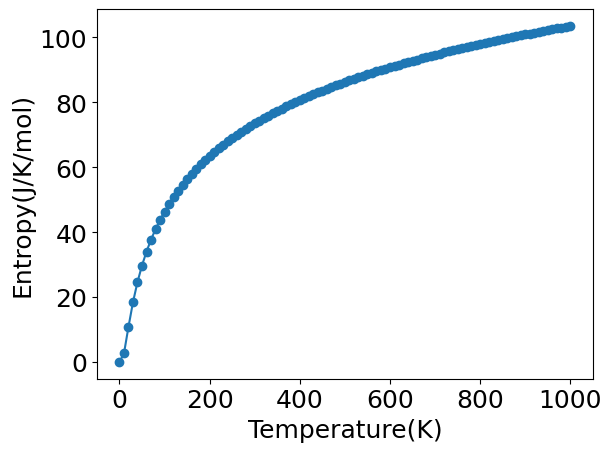

In [21]:
import matplotlib.pyplot as plt
# Temperatures in K,
# Helmholtz free energies in kJmol,
# Entropies in J/K/mol,
# Heat capacities. in J/K/mol.
%matplotlib inline
plt.plot(thermal_prop_cu['temperatures'],thermal_prop_cu['entropy'],'-o')
plt.xlabel('Temperature(K)')
plt.ylabel('Entropy(J/K/mol)')

#FEG

In [25]:
ph_feg,thermal_prop_feg = get_thermal_prop(poscar_string=feg)

TiPbO3
1.0
3.8647414864 0.0 0.0
0.0 3.8647414864 0.0
0.0 0.0 4.02766986115
Ti Pb O
1 1 3
Cartesian
1.93237 1.93237 1.8291492354574337
0.0 0.0 3.9746532424988255
1.93237 1.93237 3.6229841737076196
1.93237 0.0 1.5578902476680754
0.0 1.93237 1.5578902476680754

dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_wt10
dir_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_fd
model_path /usr/local/lib/python3.10/dist-packages/alignn/ff/alignnff_fd


Text(0, 0.5, 'Entropy(J/K/mol)')

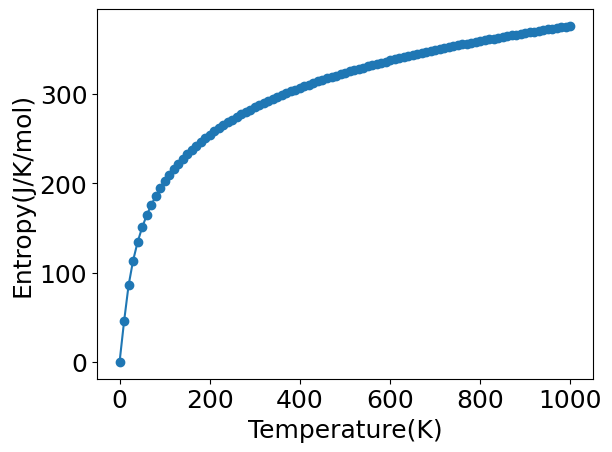

In [26]:
import matplotlib.pyplot as plt
# Temperatures in K,
# Helmholtz free energies in kJmol,
# Entropies in J/K/mol,
# Heat capacities. in J/K/mol.
%matplotlib inline
plt.plot(thermal_prop_feg['temperatures'],thermal_prop_feg['entropy'],'-o')
plt.xlabel('Temperature(K)')
plt.ylabel('Entropy(J/K/mol)')

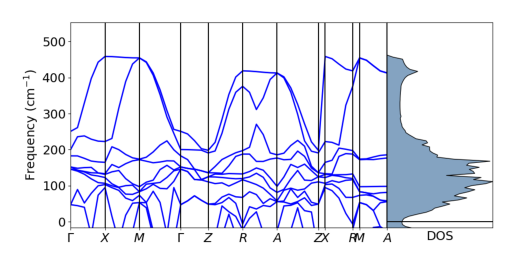

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(plt.imread("phonopy_bands.png"))
plt.show()

In [ ]:
#90DW
ph_dw90,thermal_prop_dw90 = get_thermal_prop(poscar_string=dw90)

Ti0Pb0O30
1.0
3.868319083110622 0.0 0.0
0.0 5.553660427356976 0.0
0.0 0.0 28.000642678052227
Ti Pb O
10 10 30
Cartesian
1.9341599999999997 4.036449291955457 11.175022116039607
1.9341599999999997 1.3659913562590593 8.368765507364214
1.9341599999999997 4.256588362451136 5.564878107564755
1.9341599999999997 1.5864022968317586 2.7694294739044474
1.9341599999999997 4.372546703627322 27.977442625101347
1.9341599999999997 1.517210708044543 25.17534211603961
1.9341599999999997 4.187668643740941 22.369085507364215
1.9341599999999997 1.2970716375488642 19.565198107564754
1.9341599999999997 3.9672577031682414 16.769749473904447
1.9341599999999997 1.1811132963726783 13.977122625101348
0.0 3.8807239926789605 14.083103586872467
0.0 1.1598421108872765 16.88299644643614
0.0 4.124273768315568 19.680867843883547
0.0 4.372705087302447 25.285773257206436
0.0 1.4837365025370541 22.483425047787374
0.0 4.393817889112723 2.8826764464361436
0.0 1.4293862316844315 5.680547843883547
0.0 4.069923497462946 8.48310